<a href="https://colab.research.google.com/github/lima-breno/sampling_models/blob/main/Lista_3_regress%C3%A3o_log%C3%ADstica_m%C3%BAltipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------------------------------------------------------------------
*  PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS
*  PROFESSOR: ANAÍLE MENDES RABELO
*  MATRÍCULA: 218150
*  NOME: BRENO LIMA MAIA DA SILVA
*  ATIVIDADE: LISTA 03

-------------------------------------------------------------------------

**Atividade**:

Determinar a probabilidade do usuário de comprar uma SUV, baseado em sua idade e salário. Utilizando a base de dados SUV_Network_Ads.csv

Não esqueça de realizar a análise descritiva e verificar todas as suposições.

Faça a interpretação do ODDS.

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import lilliefors
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import het_breuschpagan
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/SUV_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
#Verificando se há valores ausentes
data.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


## Análise descritiva

In [ ]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Verificamos aqui que "Purchased" está como int. Precisamos ajustar para torná-lo uma variável categórica. Abaixo é descrito como renomear a variável


In [ ]:
#Renomeando a variável "Purchased"
data['Purchased'] = data['Purchased'].replace({0: 'Não comprado', 1: 'Comprado'})

In [ ]:
data.dtypes

,0
User ID,int64
Gender,object
Age,int64
EstimatedSalary,int64
Purchased,object


In [ ]:
data.Purchased.value_counts()

,count
Purchased,
Não comprado,257
Comprado,143


In [ ]:
#Transformando em variável categórica
data['Purchased'] = data['Purchased'].astype('category')
data.dtypes

,0
User ID,int64
Gender,object
Age,int64
EstimatedSalary,int64
Purchased,category


### ***Modelo proposto - Considerando uma variável independente***
Queremos identificar se a compra do SUV apresenta relação entre idade e salário do comprador.

Assim, teremos que considerar o modelo com uma única variável independente

Os pressupostos são:
- Variável dependente b

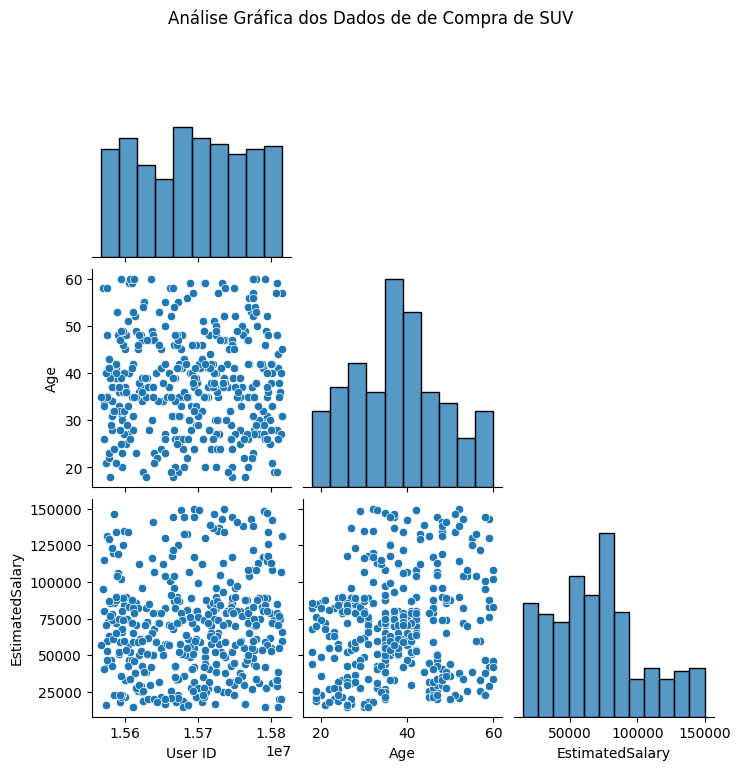

In [ ]:
# Análise gráfica - Pairplot
sns.pairplot(data, corner=True)
plt.suptitle("Análise Gráfica dos Dados de de Compra de SUV", y=1.02)
plt.show()

In [ ]:
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})

In [ ]:
#Renomeando a variável "Purchased"
data['Purchased'] = data['Purchased'].replace({'Não comprado':0 , 'Comprado':1})

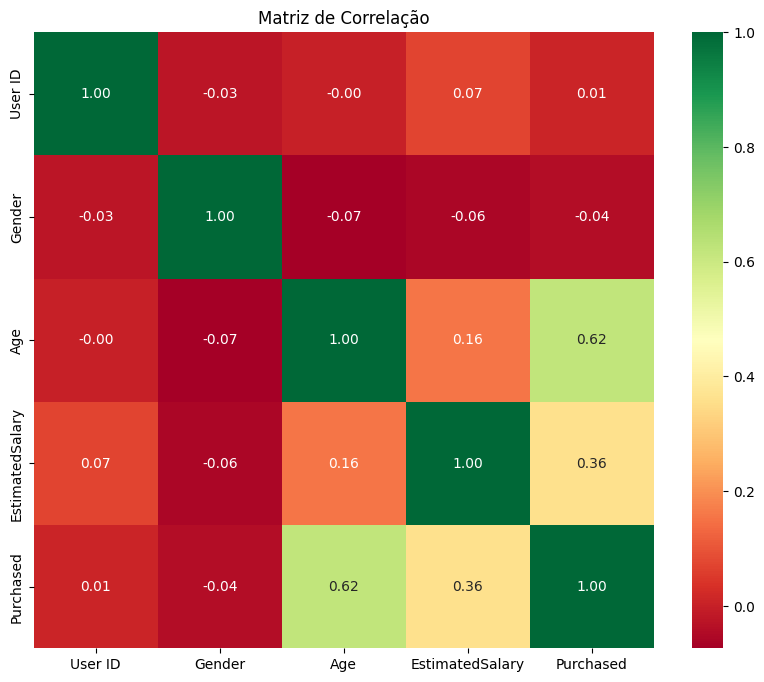

In [ ]:
#Correlação de variáveis
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

É possível verificar que as maiores correlações relacionadas à compra são:
- Age: 0.62
- Estimated Salary: 0.36

A partir disto, podemos criar modelos baseados na correlação entre estas variáveis

### Regressão com as variáveis mais correlacionadas com a compra de SUV



In [ ]:
data['Purchased'] = data['Purchased'].replace({'Não comprado': 0, 'Comprado': 1})
data['Purchased'] = pd.to_numeric(data['Purchased'])

In [ ]:
model = smf.glm(formula='Purchased ~ Age + EstimatedSalary', data=data, family = sm.families.Binomial()).fit()
print(modelo1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      397
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -138.53
Date:                Mon, 13 Jan 2025   Deviance:                       277.05
Time:                        23:52:03   Pearson chi2:                     467.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4574
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.4340      1.300     

Deviance Residuals

In [ ]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import chi2, chisquare
from statsmodels.graphics.regressionplots import abline_plot
import scipy.stats as stats  # Importando o módulo stats da biblioteca SciPy

# Teste de Deviance para os Resíduos
deviance_test_statistic = model.deviance
deviance_df = model.df_resid
deviance_p_value = 1 - stats.chi2.cdf(deviance_test_statistic, deviance_df)

print("Teste de Deviance para os Resíduos:")
print("Estatística de teste:", deviance_test_statistic)
print("Graus de liberdade:", deviance_df)
print("Valor p:", deviance_p_value)

Teste de Deviance para os Resíduos:
Estatística de teste: 277.05138239148346
Graus de liberdade: 397
Valor p: 0.9999990198090116


Vemos que o p-valor é maior que 0.05, indicando que o modelo ajusta bem os dados apresentados.


Teste de adequação do modelo

Pearson Chi-Square Test


In [ ]:
# Obtendo os resíduos de Pearson
residuos_pearson = modelo1.resid_pearson

# Teste de Pearson para os Resíduos
pearson_test_statistic = np.sum(residuos_pearson**2)
pearson_df = len(residuos_pearson) - modelo1.df_model - 1  # Graus de liberdade corrigidos
pearson_p_value = 1 - stats.chi2.cdf(pearson_test_statistic, pearson_df)


print("\nTeste de Pearson para os Resíduos:")
print("Estatística de teste:", pearson_test_statistic)
print("Graus de liberdade:", pearson_df)
print("Valor p:", pearson_p_value)



Teste de Pearson para os Resíduos:
Estatística de teste: 466.77640978841947
Graus de liberdade: 397
Valor p: 0.008947131734816094


É posível verificar que por esse teste o modeo não se adequa muito bem, resultado do p-valor menor que 0,05. Entretanto, como o Deviance acusou se tratar de um bom modelo, seguiremos assim.

Razão de chance

In [ ]:
razao = np.exp(modelo1.params[1])
razao

1.2629994932016932

Considerando o ODDS raio é possível verificar que a chance de comprar o carro considerando a idade e o salário aumenta cerca de 26,3% a chance de compras.

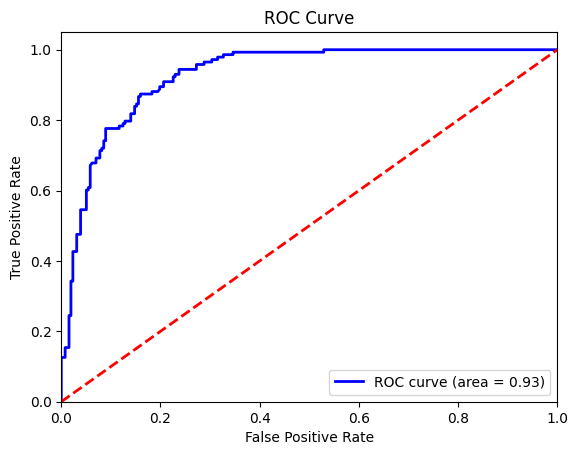

In [ ]:
from sklearn.metrics import roc_curve, auc

y = data["Purchased"]

# ROC Curve
fpr, tpr, _ = roc_curve(y, modelo1.fittedvalues)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

É possível verificar que a área da curva foi de 0.93, indicando que se trata de uma excelente discriminação. Deixando evidenciado que se trata de um bom modelo.